# Import the Library

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# import dataset
os.getcwd()

'C:\\Users\\dasar.SELVAMDG\\Desktop\\p\\Linear_Regression'

In [9]:
dataset = pd.read_csv("C:/Users/dasar.SELVAMDG/Desktop/p/Data_Preprocessing/dataset/LR_dataset/USA_Housing.csv")

dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
#Basic Statisctics
dataset.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Datapreprocessing steps

## Handling missing values

In [16]:
# Handling missing values
dataset.isnull().sum()
dataset.isnull().any()
# False means no missing values in the data

Avg. Area Income                False
Avg. Area House Age             False
Avg. Area Number of Rooms       False
Avg. Area Number of Bedrooms    False
Area Population                 False
Price                           False
Address                         False
dtype: bool

## Handling Outliers

<Axes: ylabel='Avg. Area Income'>

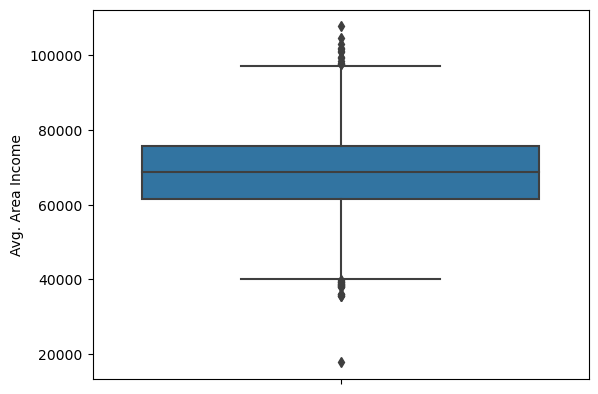

In [17]:
# Handling Outliers
sns.boxplot(y = 'Avg. Area Income', data= dataset)

In [ ]:
# Outliers are easily finded in boxplot

<Axes: ylabel='Avg. Area House Age'>

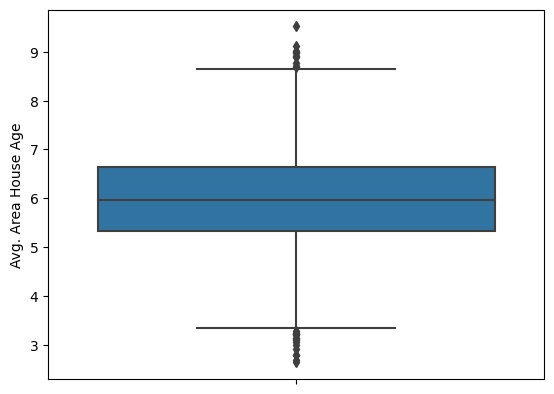

In [18]:
sns.boxplot(y = 'Avg. Area House Age', data= dataset)

<Axes: ylabel='Avg. Area Number of Rooms'>

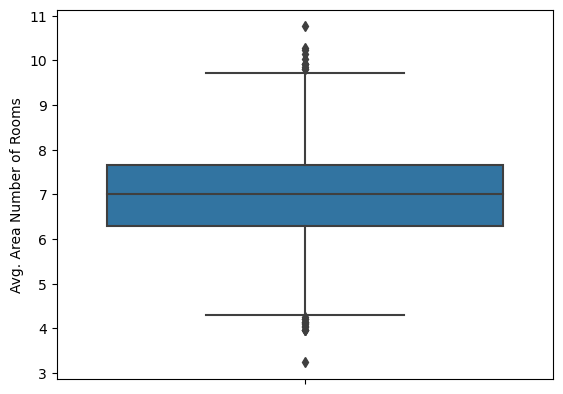

In [19]:
sns.boxplot(y = 'Avg. Area Number of Rooms', data= dataset)

<Axes: ylabel='Avg. Area Number of Bedrooms'>

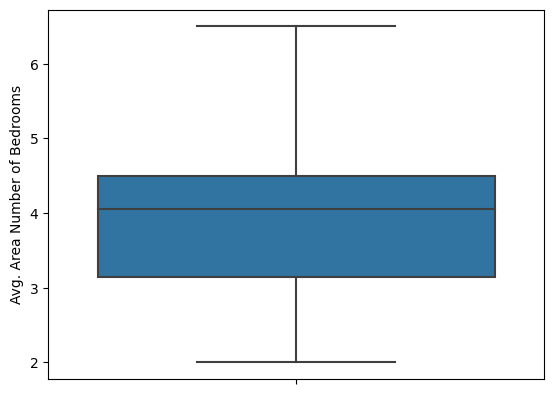

In [20]:
sns.boxplot(y = 'Avg. Area Number of Bedrooms', data= dataset)

<Axes: ylabel='Area Population'>

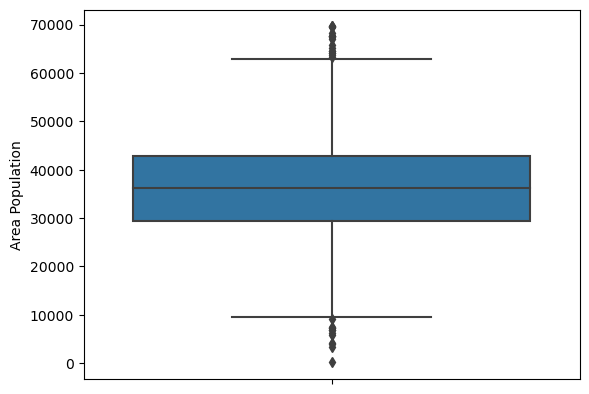

In [21]:
sns.boxplot(y = 'Area Population', data= dataset)

<Axes: ylabel='Price'>

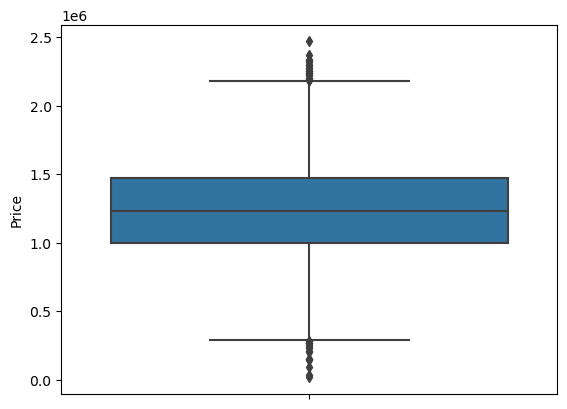

In [22]:
sns.boxplot(y = 'Price', data= dataset)

In [24]:

q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = q3 - q1
pos_outlier = q3 + 1.5 * iqr
neg_outlier = q1 - 1.5 * iqr

C:\Users\dasar.SELVAMDG\AppData\Local\Temp\ipykernel_6672\3655087505.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = dataset.quantile(0.25)
C:\Users\dasar.SELVAMDG\AppData\Local\Temp\ipykernel_6672\3655087505.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = dataset.quantile(0.75)


In [29]:
dataset = dataset[~((dataset < neg_outlier) | (dataset > pos_outlier)).any(axis=1)]

C:\Users\dasar.SELVAMDG\AppData\Local\Temp\ipykernel_6672\223172461.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset = dataset[~((dataset < neg_outlier) | (dataset > pos_outlier)).any(axis=1)]


In [35]:
# Deleting outlier parts from the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4932 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4914 non-null   float64
 1   Avg. Area House Age           4917 non-null   float64
 2   Avg. Area Number of Rooms     4919 non-null   float64
 3   Avg. Area Number of Bedrooms  4932 non-null   float64
 4   Area Population               4920 non-null   float64
 5   Price                         4918 non-null   float64
 6   Address                       4932 non-null   object 
dtypes: float64(6), object(1)
memory usage: 308.2+ KB


<Axes: ylabel='Avg. Area Income'>

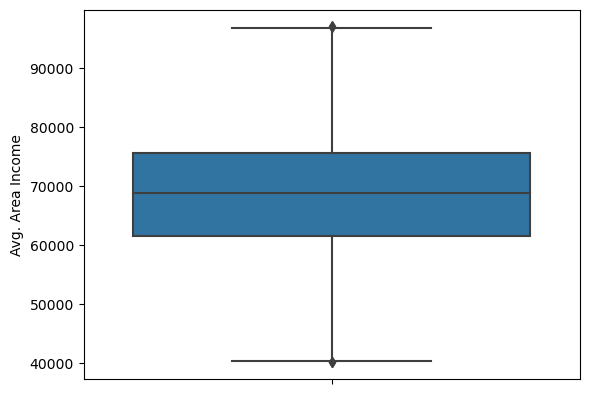

In [30]:
sns.boxplot(y = 'Avg. Area Income', data= dataset)

<Axes: ylabel='Avg. Area House Age'>

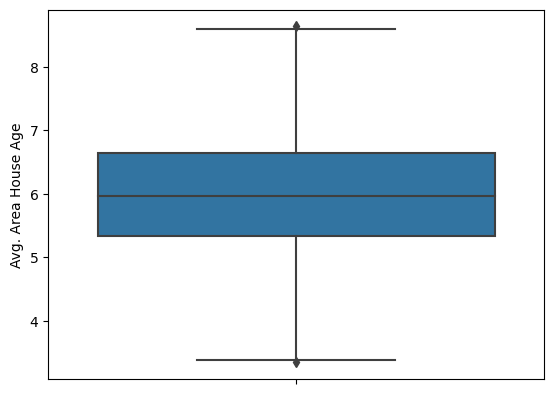

In [31]:
sns.boxplot(y = 'Avg. Area House Age', data= dataset)

<Axes: ylabel='Avg. Area Number of Rooms'>

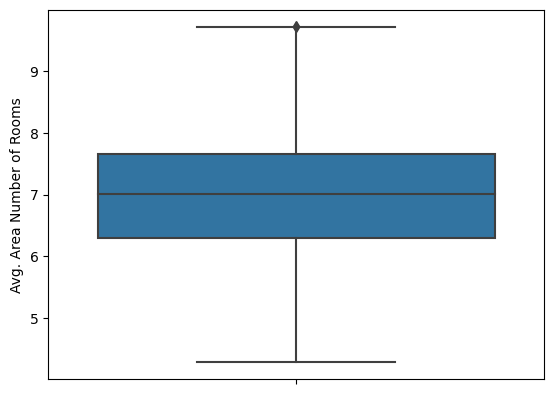

In [32]:
sns.boxplot(y = 'Avg. Area Number of Rooms', data= dataset)

<Axes: ylabel='Area Population'>

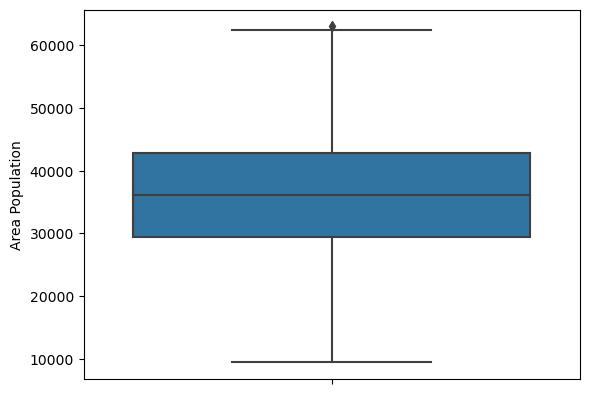

In [33]:
sns.boxplot(y = 'Area Population', data= dataset)

<Axes: ylabel='Price'>

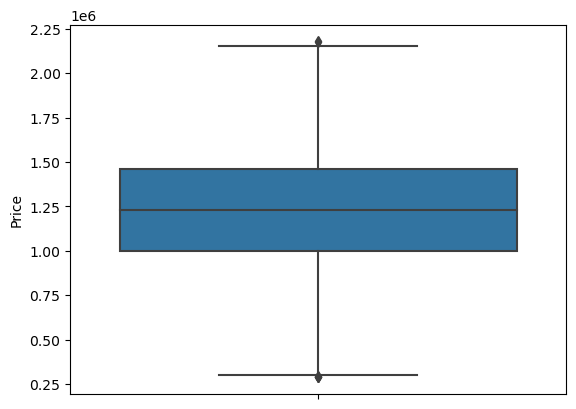

In [34]:
sns.boxplot(y = 'Price', data= dataset)

# Encoding

In [38]:
# 1. Lable Encode 2. One hot Encoder 3.Dummy variable
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [40]:
dataset = dataset.iloc[:,0:6]
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


## feature scaling

#### will do later

# EDA - Exploratory Data Analysis

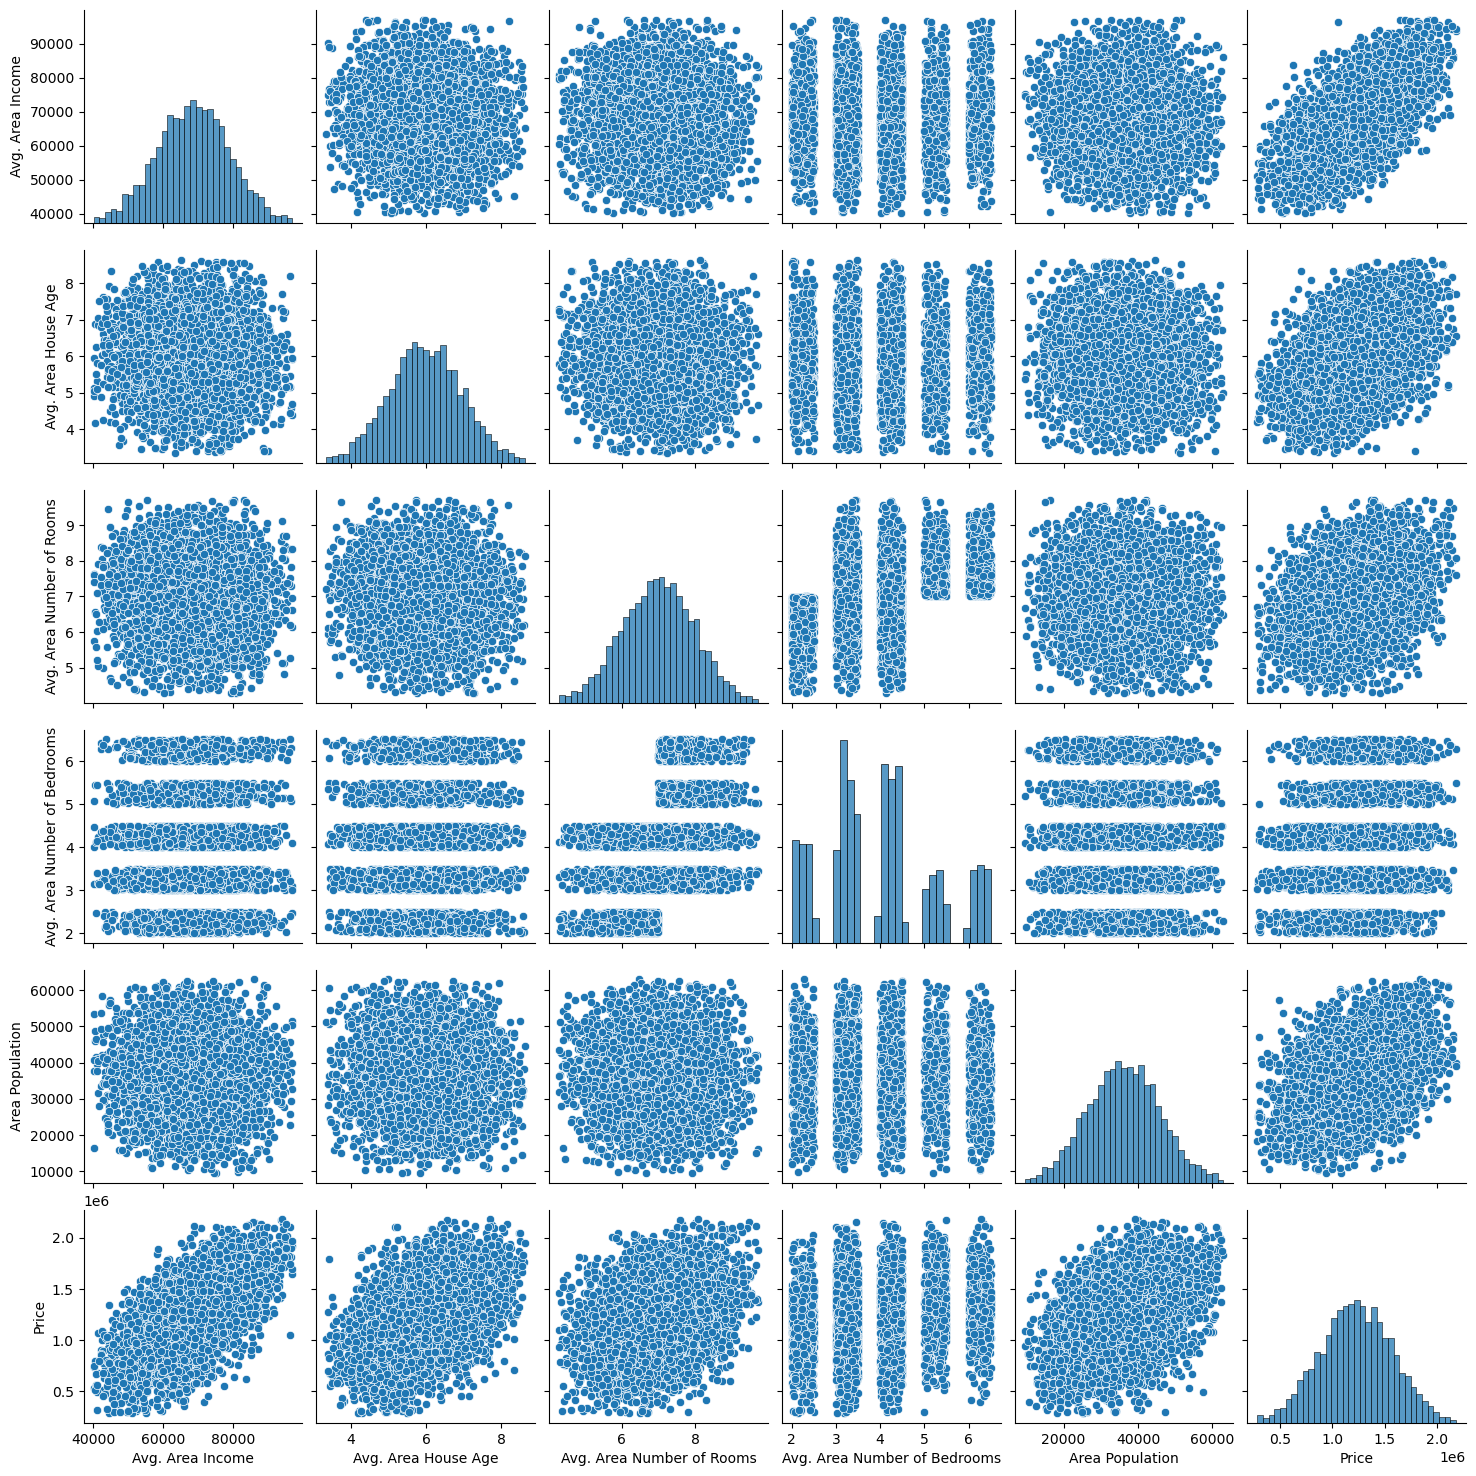

In [41]:
sns.pairplot(dataset)

### univariate


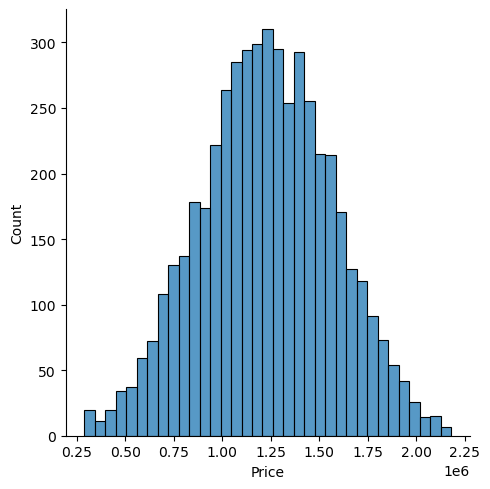

In [45]:
sns.displot(dataset['Price'])

### Bivariate

In [46]:
dataset.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.015568,-0.017797,0.014482,-0.008860,0.627548
Avg. Area House Age,-0.015568,1.000000,-0.013780,0.002236,-0.021623,0.437542
Avg. Area Number of Rooms,-0.017797,-0.013780,1.000000,0.466920,-0.003903,0.324955
Avg. Area Number of Bedrooms,0.014482,0.002236,0.466920,1.000000,-0.024763,0.169200
Area Population,-0.008860,-0.021623,-0.003903,-0.024763,1.000000,0.401211
Price,0.627548,0.437542,0.324955,0.169200,0.401211,1.000000


<Axes: >

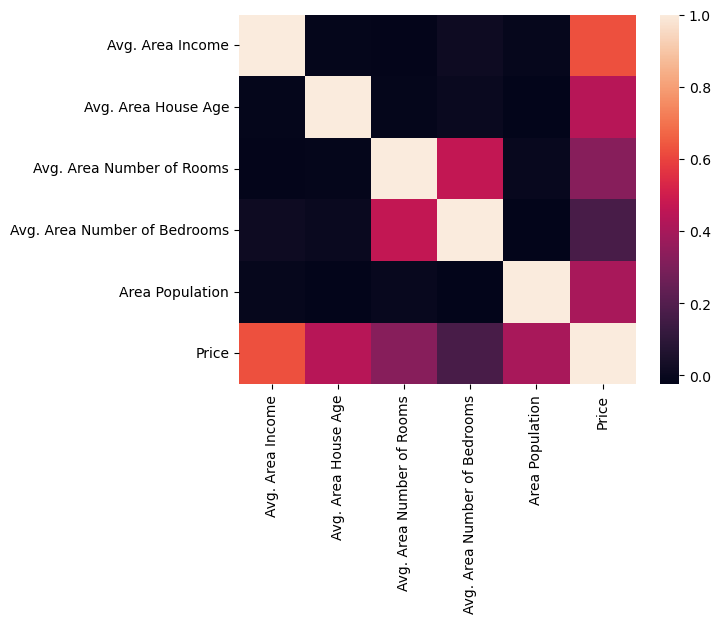

In [52]:
sns.heatmap(dataset.corr())

<Axes: >

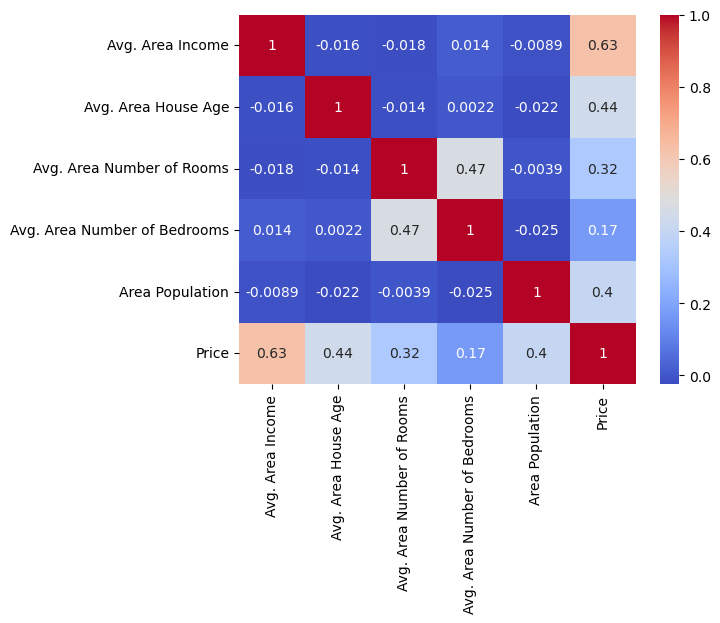

In [51]:
sns.heatmap(dataset.corr(), annot = True, cmap = 'coolwarm')